### Lab: Clustering with Sklearn

In [1]:
%matplotlib inline
from collections import Counter
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics

plt.rcParams['figure.figsize'] = (8, 6)

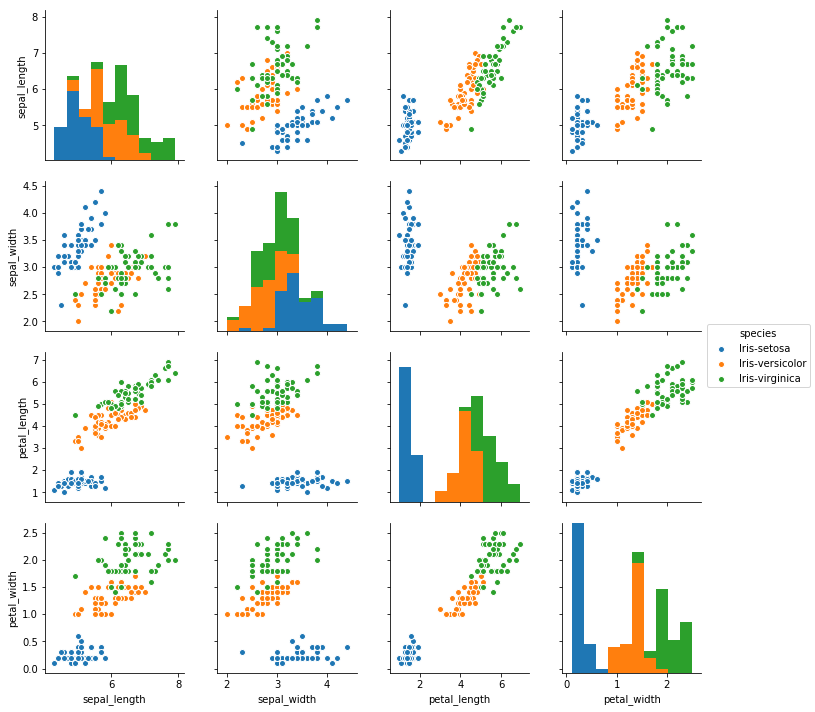

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
iris = pd.read_csv("data/iris/iris.data")
sns.pairplot(iris, hue="species")
plt.show()
iris.tail()

### 1. K-Means

For the Iris dataset, fit and plot k-means models to:
* sepal_length and petal_length, for k=3
* sepal_width and petal_width, for k=3

After: Check out the 3D-example [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

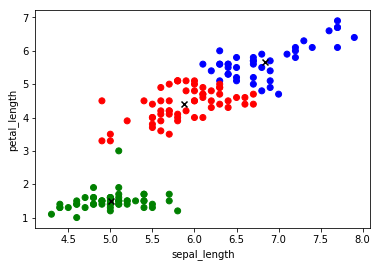

In [10]:
# Plot the data
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

# Fit a k-means cluster for sepal_length and petal_length
estimator = KMeans(n_clusters = 3)
X = iris[['sepal_length', 'petal_length']]
estimator.fit(X)
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(iris[['sepal_length']], iris['petal_length'], c=colors)
for center in estimator.cluster_centers_:
    plt.scatter(center[0], center[1], c="black", marker="x")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()


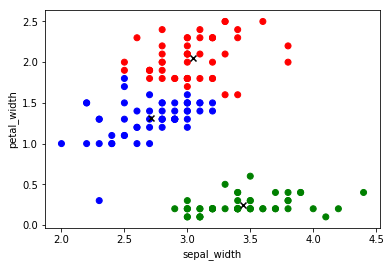

In [11]:
# Fit a k-means cluster for sepal_width and petal_width
estimator = KMeans(n_clusters = 3)
X = iris[['sepal_width', 'petal_width']]
estimator.fit(X)
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(iris[['sepal_width']], iris['petal_width'], c=colors)
for center in estimator.cluster_centers_:
    plt.scatter(center[0], center[1], c="black", marker="x")
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.show()

### 2. DBSCAN

For the Iris dataset, fit and plot DBSCAN models to:
* sepal_length and petal_length
* sepal_width and petal_width

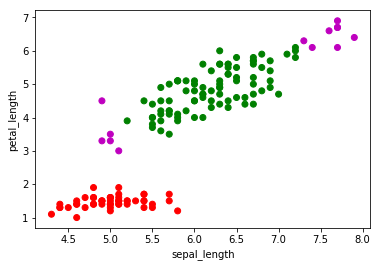

In [19]:
# Fit a DBSCAN estimator with sepal_length and petal_length
estimator = DBSCAN(eps=0.6, min_samples=20)
X = iris[['sepal_length', 'petal_length']]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
colors = set_colors(labels)
plt.scatter(iris['sepal_length'], iris['petal_length'], c=colors)
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()

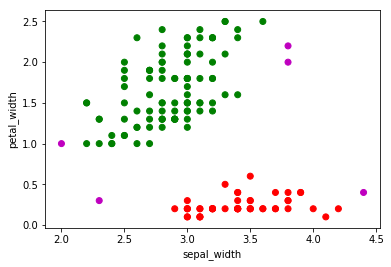

In [20]:
# Fit a DBSCAN estimator with sepal_width and petal_width
estimator = DBSCAN(eps=0.3, min_samples=10)
X = iris[['sepal_width', 'petal_width']]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
colors = set_colors(labels)
plt.scatter(iris['sepal_width'], iris['petal_width'], c=colors)
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.show()

### Bonus: Try clustering different beers

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
